## Animals dataset from CIFAR-10 ##

This notebook generates the Animals dataset that was used in the second tutorial. The image were taken from CIFAR-10, an image classification benchmark dataset containing 10 different classes of images.

In [1]:
import os, subprocess, urllib, pickle
import numpy as np
import matplotlib.pyplot as plt

Download CIFAR-10 from [this URL](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz), decompress it and place it in the **data** directory.

In [2]:
cifar_path = "data/cifar-10-batches-py"
batch_prefix = "data_batch_"
num_batches = 5

Load the data files and reformat them.

In [3]:
# taken from: https://www.cs.toronto.edu/~kriz/cifar.html
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
batches = []

for batch_idx in range(num_batches):
    batch_path = os.path.join(cifar_path, "{:s}{:d}".format(batch_prefix, batch_idx + 1))
    batches.append(unpickle(batch_path))

In [5]:
data = []
labels = []

for i in range(len(batches)):
    data.append(batches[i][b"data"])
    labels.append(batches[i][b"labels"])

Extract airplane and automobile images (classes 0 and 1).

In [6]:
cats = []
deers = []
dogs = []
horses = []

for i in range(len(batches)):
    for j in range(len(labels[i])):
        if labels[i][j] == 3:
            cats.append(data[i][j])
        elif labels[i][j] == 4:
            deers.append(data[i][j])
        elif labels[i][j] == 5:
            dogs.append(data[i][j])
        elif labels[i][j] == 7:
            horses.append(data[i][j])
            
assert len(cats) == 5000
assert len(deers) == 5000
assert len(dogs) == 5000
assert len(horses) == 5000

Reformat images.

In [7]:
def reformat_image(image):
    new_image = np.zeros((32, 32, 3))
    
    red = image[:1024]
    green = image[1024:2048]
    blue = image[2048:]
    
    red = np.reshape(red, (32, 32))
    green = np.reshape(green, (32, 32))
    blue = np.reshape(blue, (32, 32))
    
    new_image[:, :, 0] = red
    new_image[:, :, 1] = green
    new_image[:, :, 2] = blue
    
    return new_image

In [8]:
for i in range(len(cats)):
    cats[i] = reformat_image(cats[i])
    deers[i] = reformat_image(deers[i])
    dogs[i] = reformat_image(dogs[i])
    horses[i] = reformat_image(horses[i])

In [9]:
cats = np.array(cats)
deers = np.array(deers)
dogs = np.array(dogs)
horses = np.array(horses)

Make sure the images were extracted correctly.

left to right: cat, deer, dog, horse
run again for different images


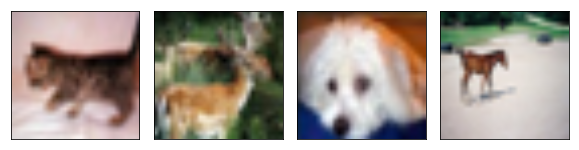

In [10]:
print("left to right: cat, deer, dog, horse")
print("run again for different images")

from mpl_toolkits.axes_grid1 import ImageGrid

index = np.random.randint(0, len(cats))

fig = plt.figure(1, figsize=(10, 10))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 4), axes_pad=0.2)

grid[0].imshow(cats[index] / 255, interpolation="bilinear")
grid[0].tick_params(axis='both', which='both', bottom='off', top='off', 
                labelbottom='off', right='off', left='off', labelleft='off')

grid[1].imshow(deers[index] / 255, interpolation="bilinear")
grid[1].tick_params(axis='both', which='both', bottom='off', top='off', 
                labelbottom='off', right='off', left='off', labelleft='off')

grid[2].imshow(dogs[index] / 255, interpolation="bilinear")
grid[2].tick_params(axis='both', which='both', bottom='off', top='off', 
                labelbottom='off', right='off', left='off', labelleft='off')

grid[3].imshow(horses[index] / 255, interpolation="bilinear")
grid[3].tick_params(axis='both', which='both', bottom='off', top='off', 
                labelbottom='off', right='off', left='off', labelleft='off')

plt.show()

Create training, validation and testing subsets.

In [12]:
train_size = 4500
valid_size = 250
test_size = 250

In [13]:
def create_splits(data):
    train = data[:train_size]
    valid = data[train_size:train_size + valid_size]
    test = data[train_size + valid_size:train_size + valid_size + test_size]

    assert len(train) == train_size
    assert len(valid) == valid_size
    assert len(test) == test_size
    
    return train, valid, test

In [14]:
train_cats, valid_cats, test_cats = create_splits(cats)
train_deers, valid_deers, test_deers = create_splits(deers)
train_dogs, valid_dogs, test_dogs = create_splits(dogs)
train_horses, valid_horses, test_horses = create_splits(horses)

Merge the animal pictures.

In [15]:
labels = {
    0: "cat",
    1: "deer",
    2: "dog",
    3: "horse"
}

train_data = np.concatenate((train_cats, train_deers, train_dogs, train_horses))
train_labels = np.concatenate(([0] * train_size, [1] * train_size, [2] * train_size, [3] * train_size))

valid_data = np.concatenate((valid_cats, valid_deers, valid_dogs, valid_horses))
valid_labels = np.concatenate(([0] * valid_size, [1] * valid_size, [2] * valid_size, [3] * valid_size))

test_data = np.concatenate((test_cats, test_deers, test_dogs, test_horses))
test_labels = np.concatenate(([0] * test_size, [1] * test_size, [2] * test_size, [3] * test_size))

assert train_data.shape[0] == train_labels.shape[0]
assert valid_data.shape[0] == valid_labels.shape[0]
assert test_data.shape[0] == test_labels.shape[0]

In [16]:
dataset = {
    "train_data": train_data,
    "train_labels": train_labels,
    "valid_data": valid_data,
    "valid_labels": valid_labels,
    "test_data": test_data,
    "test_labels": test_labels,
    "labels": labels
}

Save the new dataset.

In [17]:
dataset_path = "data/animals"

if not os.path.isdir(dataset_path):
    os.makedirs(dataset_path)
    
with open(os.path.join(dataset_path, "dataset.pickle"), "wb") as file:
    pickle.dump(dataset, file)

(Optional) Nice visualization.

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(1, figsize=(7, 7))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=0.2)

for i, images in enumerate([cats, deers, dogs, horses]):
    for j in range(4):
        index = np.random.randint(0, len(images))
        
        grid[i * 4 + j].imshow(images[index] / 255, interpolation="bessel")
        grid[i * 4 + j].tick_params(axis='both', which='both', bottom='off', top='off', 
                        labelbottom='off', right='off', left='off', labelleft='off')

plt.tight_layout()
plt.savefig(os.path.join(dataset_path, "animals.png"), transparent=True)